In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from IPython.display import Image


### Datasets
https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f/data
___
https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme/data
___


In [2]:
# Lets start by exploring the data
df = pd.read_csv("CTA_L_Ridership.csv")

In [3]:
df.head()

,station_id,stationname,date,daytype,rides
0,40010,Austin-Forest Park,01/01/2001,U,290
1,40020,Harlem-Lake,01/01/2001,U,633
2,40030,Pulaski-Lake,01/01/2001,U,483
3,40040,Quincy/Wells,01/01/2001,U,374
4,40050,Davis,01/01/2001,U,804


In [4]:
df.shape

(879576, 5)

So the data looks like how it was described from the Data Portal

In [5]:
# Check for null values
df.isnull().values.any()

False

In [6]:
df_avg = df.groupby('station_id')['stationname', 'rides'].mean()
    

In [7]:
df_avg.reset_index(inplace=True)

In [8]:
df_avg.head()

,station_id,rides
0,40010,1536.416437
1,40020,3094.157282
2,40030,1436.182215
3,40040,5624.562288
4,40050,3321.967956


In [9]:
df_avg.sort_values('rides', ascending=False).head(3)

,station_id,rides
36,40380,13829.990290
142,41660,13597.645469
135,41450,12980.024603


In [10]:
df.loc[df['station_id'] == 40380].head(1)

,station_id,stationname,date,daytype,rides
36,40380,Clark/Lake,01/01/2001,U,1080


# Clark/Lake has the highest daily average ridership 

Makes sense since all the lines transfer there

In [11]:
df.tail()

,station_id,stationname,date,daytype,rides
879571,41700,Washington/Wabash,11/26/2017,U,4122
879572,41700,Washington/Wabash,11/27/2017,W,10244
879573,41700,Washington/Wabash,11/28/2017,W,10505
879574,41700,Washington/Wabash,11/29/2017,W,10437
879575,41700,Washington/Wabash,11/30/2017,W,10653


In [12]:
df.daytype.value_counts()

W    614609
U    139955
A    125012
Name: daytype, dtype: int64

In [13]:
# "W" for Weekday, "A" for Saturday and "U" for Sunday/Holidays
df_weekday = df.loc[df['daytype'] == 'W']

In [14]:
df_weekday.shape

(614609, 5)

In [15]:
# standard deviation by station on non-holiday weekdays
df_std = df_weekday.groupby('station_id')['stationname', 'rides'].std().reset_index()

In [16]:
df_std.sort_values('rides', ascending=False).head(3)

,station_id,rides
146,41700,4444.285216
142,41660,4404.533162
47,40500,3890.640503


In [17]:
df.loc[df['station_id'] == 41700].head(1)

,station_id,stationname,date,daytype,rides
866350,41700,Washington/Wabash,08/01/2017,W,0


In [18]:
df.loc[(df['station_id'] == 41700) & (df['rides'] != 0)].head(5)

,station_id,stationname,date,daytype,rides
866377,41700,Washington/Wabash,08/28/2017,W,7
866378,41700,Washington/Wabash,08/29/2017,W,45
866379,41700,Washington/Wabash,08/30/2017,W,96
866380,41700,Washington/Wabash,08/31/2017,W,6244
870701,41700,Washington/Wabash,09/01/2017,W,6932


# Washington/Wabash has the highest standard deviation on non-holiday weekdays

It's was underconstruction and had no ridership during that time

# Scenario

Lets say Peets Coffee wants to expand in Chicago and is looking for new locations to start. L stations with high ridership is a good place to look since there would be a lot of pedestrian traffic. Let's take a look at this data and determine viable locations to open up a new shop.

In [19]:
# subset the dataframe for only 2017
df_2017 = df[df['date'].str.contains("2017")].copy()

In [20]:
df_2017.head()

,station_id,stationname,date,daytype,rides
831358,40010,Austin-Forest Park,02/01/2017,W,2160
831359,40020,Harlem-Lake,02/01/2017,W,3810
831360,40030,Pulaski-Lake,02/01/2017,W,1543
831361,40040,Quincy/Wells,02/01/2017,W,8231
831362,40050,Davis,02/01/2017,W,3602


In [21]:
df_2017.tail()

,station_id,stationname,date,daytype,rides
879571,41700,Washington/Wabash,11/26/2017,U,4122
879572,41700,Washington/Wabash,11/27/2017,W,10244
879573,41700,Washington/Wabash,11/28/2017,W,10505
879574,41700,Washington/Wabash,11/29/2017,W,10437
879575,41700,Washington/Wabash,11/30/2017,W,10653


So the data is only from Feb 2017 to Nov 2017.

We only care about non-holiday weekdays since those would be the days with the most business.

In [22]:
df_2017 = df_2017.loc[df_2017['daytype'] == 'W']

It's also important to see what stations have 0 rides and try to see if the site is under construction. These would skew results if we just took the average.

In [23]:
df_2017.loc[df_2017["rides"] == 0].groupby('station_id').agg({'stationname': 'max', 'rides': 'count'})

,stationname,rides
station_id,,
40200,Randolph/Wabash,59
40640,Madison/Wabash,234
41700,Washington/Wabash,19


Might as well take a look into these

In [24]:
#convert to date into a python date object we can use
df_2017['date_obj'] = pd.to_datetime(df_2017['date'])

In [25]:
df_2017 = df_2017[['station_id', 'stationname', 'date_obj', 'rides']]

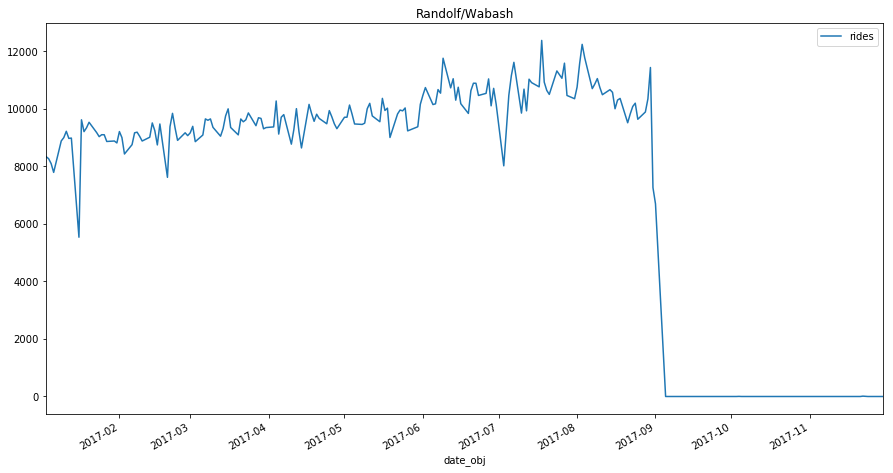

In [26]:
df_2017.loc[df_2017['station_id'] == 40200][['date_obj', 'rides']].set_index('date_obj').plot(title="Randolf/Wabash", figsize=(15,8))

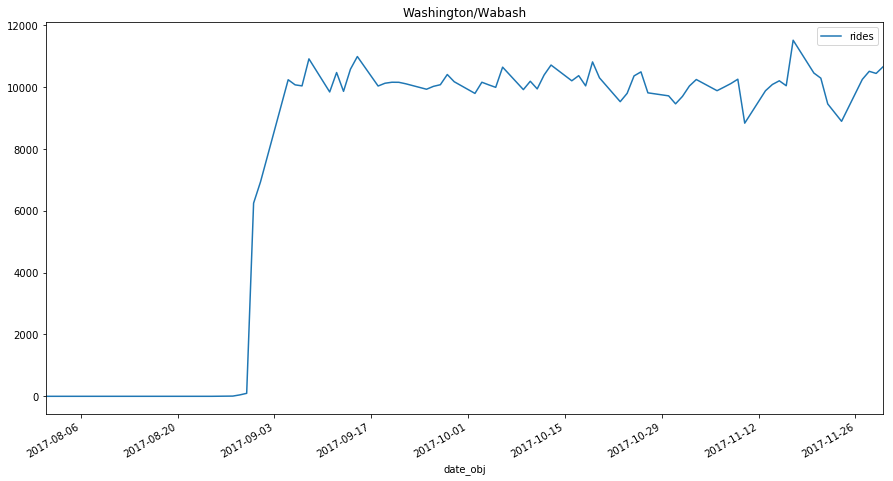

In [27]:
df_2017.loc[df_2017['station_id'] == 41700][['date_obj', 'rides']].set_index('date_obj').plot(title="Washington/Wabash", figsize=(15,8))

Taking a look at the 3 outliers, The Randolf & Washington stop looks like it's closed while the Washington & Wabash opened. We can dismiss the former while adjusting the average for the latter. The Madison & Wabash stop is also closed.

Lets take a look at the highest average and std dev of the L stops in 2017.

In [28]:
df_2017_avg = df_2017.groupby('station_id').agg({'stationname': 'max', 'rides': ['mean', 'std']})

In [29]:
df_2017_avg.head()

stationname        rides            
                           max         mean         std
station_id                                             
40010       Austin-Forest Park  2039.303419  171.436439
40020              Harlem-Lake  3788.418803  257.761717
40030             Pulaski-Lake  1418.794872  110.014828
40040             Quincy/Wells  8203.299145  793.944899
40050                    Davis  3706.790598  245.617054

In [30]:
#too ugly, need to change that
df_2017_avg.columns = ['stationname', 'rides_avg', 'rides_std']

In [31]:
df_2017_avg.sort_values('rides_avg', ascending=False).head(10)

,stationname,rides_avg,rides_std
station_id,,,
41660,Lake/State,21587.235043,1617.643979
40380,Clark/Lake,21473.017094,1830.458272
41450,Chicago/State,15017.542735,1135.968941
40370,Washington/Dearborn,12987.923077,918.297227
41220,Fullerton,12585.243590,2396.856669
41320,Belmont-North Main,12262.354701,931.390556
40330,Grand/State,11920.418803,1458.931196
40890,O'Hare Airport,11350.076923,1659.576605
41400,Roosevelt,11280.252137,1256.460944


In [32]:
CTA_stations = pd.read_csv('CTA_station_info.csv')

In [33]:
CTA_stations.loc[CTA_stations['MAP_ID'] == 40380]

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
88,30074,E,Clark/Lake (Inner Loop),Clark/Lake,"Clark/Lake (Blue, Brown, Green, Orange, Purple...",40380,True,False,False,True,False,False,True,False,True,True,"(41.885737, -87.630886)"
89,30075,W,Clark/Lake (Outer Loop),Clark/Lake,"Clark/Lake (Blue, Brown, Green, Orange, Purple...",40380,True,False,False,True,True,False,False,False,False,False,"(41.885737, -87.630886)"
90,30374,S,Clark/Lake (Forest Pk-bound),Clark/Lake,"Clark/Lake (Blue, Brown, Green, Orange, Purple...",40380,True,False,True,False,False,False,False,False,False,False,"(41.885737, -87.630886)"
91,30375,N,Clark/Lake (O'Hare-bound),Clark/Lake,"Clark/Lake (Blue, Brown, Green, Orange, Purple...",40380,True,False,True,False,False,False,False,False,False,False,"(41.885737, -87.630886)"


In [34]:
top10 = df_2017_avg.sort_values('rides_avg', ascending=False).head(10)

In [35]:
top10.join(CTA_stations.groupby("MAP_ID")['Location'].max())

,stationname,rides_avg,rides_std,Location
station_id,,,,
41660,Lake/State,21587.235043,1617.643979,"(41.884809, -87.627813)"
40380,Clark/Lake,21473.017094,1830.458272,"(41.885737, -87.630886)"
41450,Chicago/State,15017.542735,1135.968941,"(41.896671, -87.628176)"
40370,Washington/Dearborn,12987.923077,918.297227,"(41.883164, -87.62944)"
41220,Fullerton,12585.243590,2396.856669,"(41.925051, -87.652866)"
41320,Belmont-North Main,12262.354701,931.390556,"(41.939751, -87.65338)"
40330,Grand/State,11920.418803,1458.931196,"(41.891665, -87.628021)"
40890,O'Hare Airport,11350.076923,1659.576605,"(41.97766526, -87.90422307)"
41400,Roosevelt,11280.252137,1256.460944,"(41.867405, -87.62659)"


## Let's plot these coordinates on a map next to the current 9 Peets Locations in Chicago

Link to the google map of CTA locations and Peets Locations:
https://drive.google.com/open?id=1CaCvUY8ZrqoMeyWFsCUIE0YXpfS_aKQF&usp=sharing

The Loop has the busiest L stations. While the Loop also contains some Peets Locations, they are several blocks away from the most popular L stops.



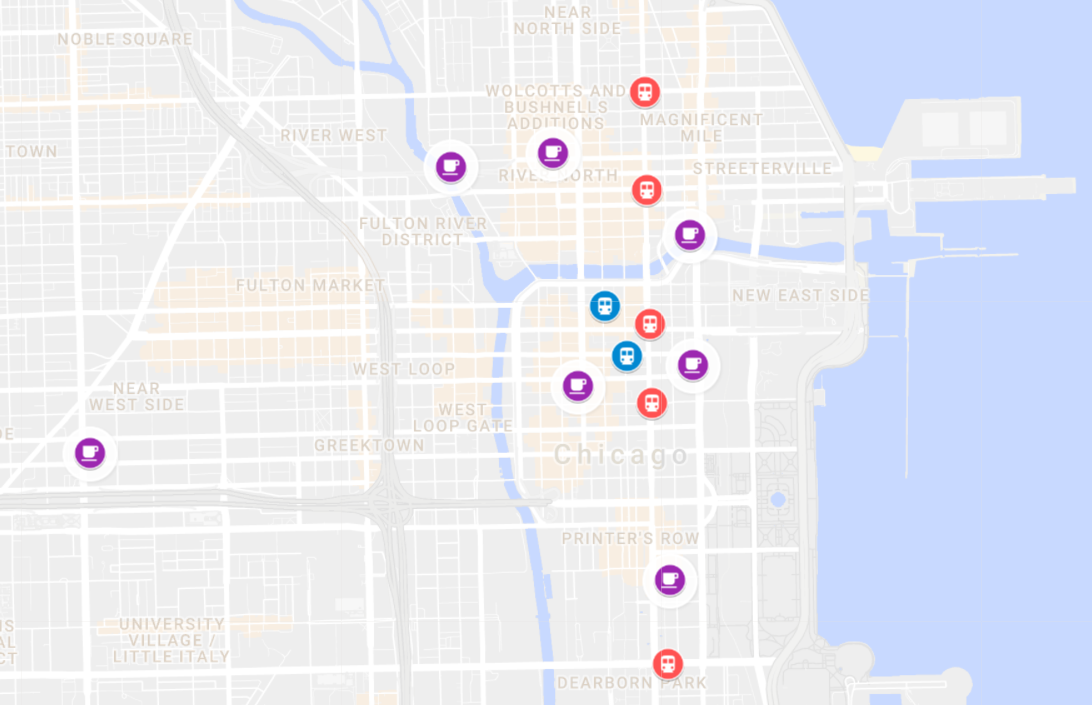

In [2]:
Image(filename="img/Peets_downtown.png", width=800, height=800)


***
The Loop and North Loop are viable locations for another shop but the area is already saturated with competitors. Here is Starbucks' footprint in the area. 
https://www.starbucks.com/store-locator?map=41.878715,-87.630632,15z&place=Chicago
***

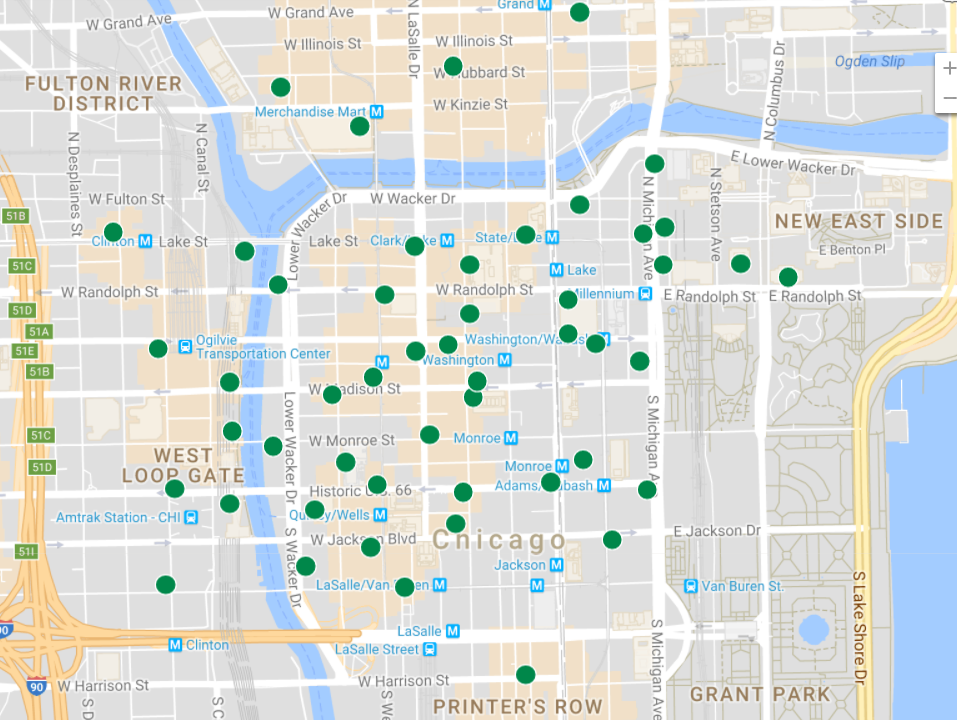

In [3]:
Image(filename="img/Starbucks_downtown.png", width=800, height=800)


***
It's going to be difficult to find an area that is not already filled with competition with Starbucks having over 150+ locations within Chicago. It would be better to expand the brand in areas where Peets is underrepresented, such as the north and northwest side.

Here are 2 stops on the Red Line, Belmont and Fullerton, that made the top 10 of ridership in 2017.

***

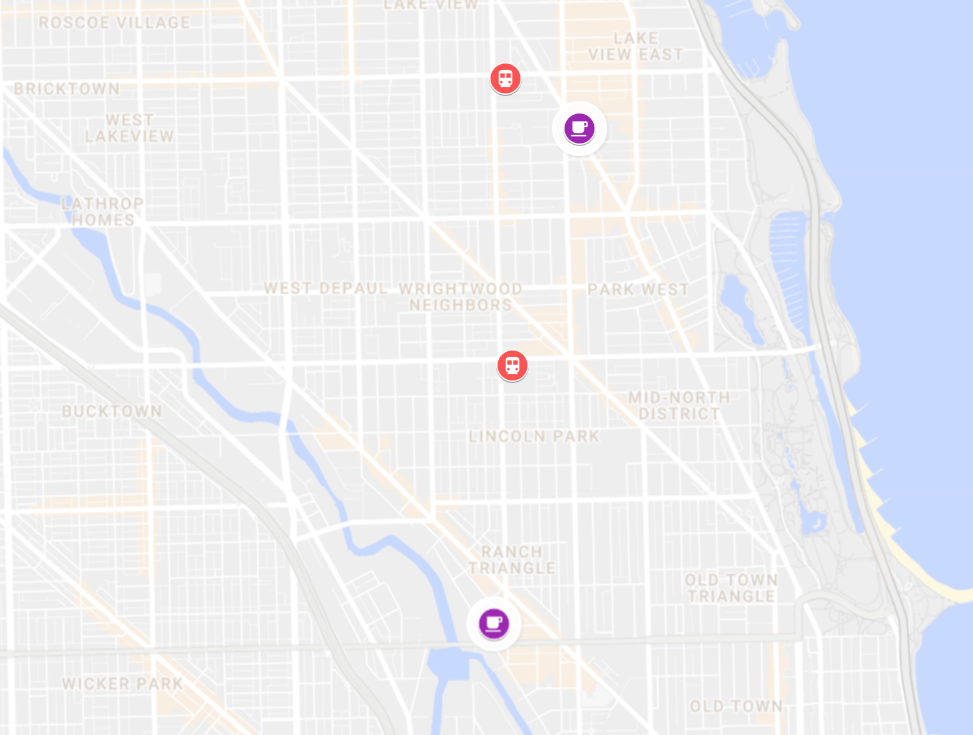

In [4]:
Image(filename="img/Peets_northside.png", width=800, height=800)

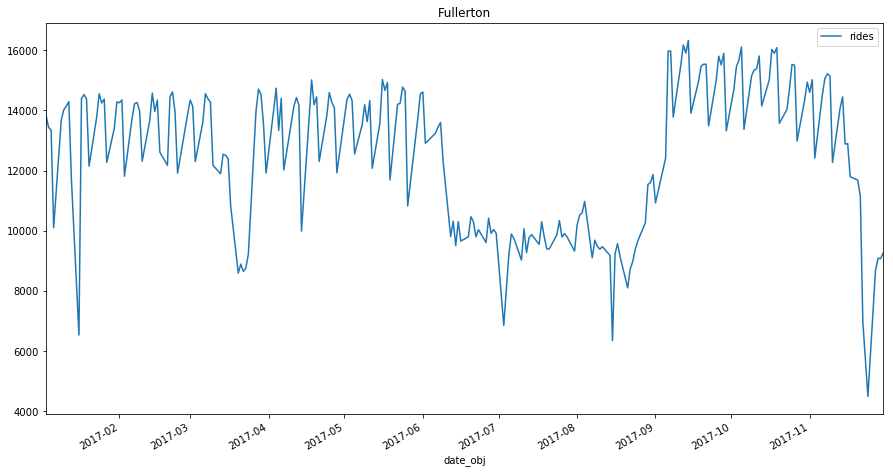

In [36]:
df_2017.loc[df_2017['station_id'] == 41220][['date_obj', 'rides']].set_index('date_obj').plot(title="Fullerton", figsize=(15,8))

***
Expanding presence near Fullerton would be great due to the high volume of traffic in that area. Although it suffers drop off during the summer most likely due to Depaul students on summer break. 
***

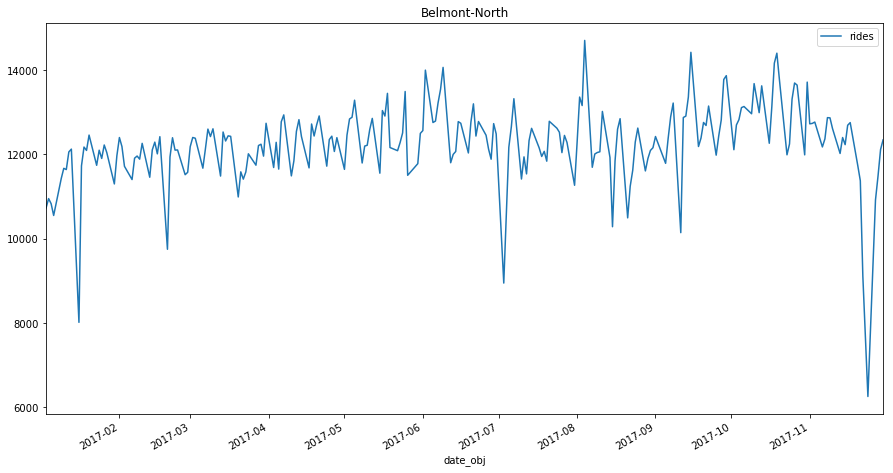

In [37]:
df_2017.loc[df_2017['station_id'] == 41320][['date_obj', 'rides']].set_index('date_obj').plot(title="Belmont-North", figsize=(15,8))

***
Belmont is the next stop and also has high traffic without a low season. The large dips are due to Thanksgiving and Christmas Holidays. 
***


### Another Location to explore is the Northwest side

We just have to look at the blue line and ridership within those stations.

In [38]:
blueline = df_2017_avg.join(CTA_stations.groupby("MAP_ID")['BLUE'].max()).reset_index()

In [39]:
blueline.loc[blueline['BLUE'] == True].sort_values('rides_avg', ascending=False)

,station_id,stationname,rides_avg,rides_std,BLUE
36,40380,Clark/Lake,21473.017094,1830.458272,True
35,40370,Washington/Dearborn,12987.923077,918.297227,True
83,40890,O'Hare Airport,11350.076923,1659.576605,True
74,40790,Monroe/Dearborn,8398.645299,665.605045,True
6,40070,Jackson/Dearborn,7434.897436,787.414587,True
95,41020,Logan Square,7366.606838,487.048780,True
119,41280,Jefferson Park,6921.363248,430.748835,True
55,40590,Damen/Milwaukee,6753.918803,516.865891,True
77,40820,Rosemont,6501.290598,629.867076,True
30,40320,Division/Milwaukee,6211.341880,479.267380,True


In [40]:
#Get the top 5 blueline stops that weren't included before or in the loop
## Just going to grab the index
blueline.iloc[[95,119,55,77,30],:]

,station_id,stationname,rides_avg,rides_std,BLUE
95,41020,Logan Square,7366.606838,487.048780,True
119,41280,Jefferson Park,6921.363248,430.748835,True
55,40590,Damen/Milwaukee,6753.918803,516.865891,True
77,40820,Rosemont,6501.290598,629.867076,True
30,40320,Division/Milwaukee,6211.341880,479.267380,True


***

The traffic here is approximately half of what could be found in the loop but Peets has 0 presence here

***

In [41]:
#compare them the all the L stations
df_2017_avg.sort_values('rides_avg', ascending=False).head(31)

,stationname,rides_avg,rides_std
station_id,,,
41660,Lake/State,21587.235043,1617.643979
40380,Clark/Lake,21473.017094,1830.458272
41450,Chicago/State,15017.542735,1135.968941
40370,Washington/Dearborn,12987.923077,918.297227
41220,Fullerton,12585.243590,2396.856669
41320,Belmont-North Main,12262.354701,931.390556
40330,Grand/State,11920.418803,1458.931196
40890,O'Hare Airport,11350.076923,1659.576605
41400,Roosevelt,11280.252137,1256.460944


In [42]:
df_2017_avg.shape

(145, 3)

***
These stations are still in the top 31 of 145 for ridership in 2017
***

In [43]:
# Omitting Rosemont since that is a transit station
## Need the coordinates
blueline.iloc[[95,119,55,30],:].set_index('station_id').join(CTA_stations.groupby("MAP_ID")['Location'].max())

,stationname,rides_avg,rides_std,BLUE,Location
station_id,,,,,
41020,Logan Square,7366.606838,487.048780,True,"(41.929728, -87.708541)"
41280,Jefferson Park,6921.363248,430.748835,True,"(41.970634, -87.760892)"
40590,Damen/Milwaukee,6753.918803,516.865891,True,"(41.909744, -87.677437)"
40320,Division/Milwaukee,6211.341880,479.267380,True,"(41.903355, -87.666496)"


***
Let's zoom out and see where these are in relation to the Peet's footprint in Chicago
***


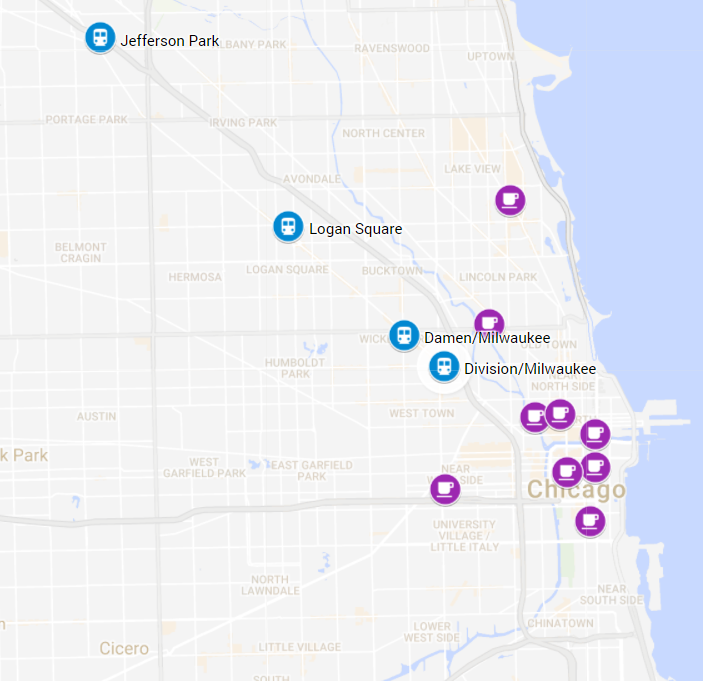

In [5]:
Image(filename="img/northwest.png", width=800, height=800)

## Summary

This workbook began exploring possible expansions for Peets Coffee within Chicago (airports excluded) using data from CTA L ridership. An option that I thought of while making this was to scrape review sites like Yelp or Google reviews to find which neighborhoods or blocks that would be open to another coffee option. Ideally, I would visualize that data by overlaying a heatmap over Chicago showing viability determined by pedestrian traffic, poor reviews from competition, and proximity to caffeine addicts.  